## Homework 1 
Curve fitting:

1.sample the function curve of y=sin(x) with Gaussian noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sin_x = np.linspace(0, (2*np.pi), 1000)
sin_y = np.sin(sin_x)

def get_data(sample_num):
    x = np.linspace(0, (2*np.pi), sample_num)
    y = np.sin(x) + np.random.randn(sample_num) * 0.2
    return x, y

def polynomial_func(x, coeff):
    y = np.zeros_like(x)
    for d, c in enumerate(coeff):
        y += c * x**d
    return y

def polynomial_map_x(x, degree):
    y = np.zeros([x.shape[0], degree+1])
    for d in range(degree+1):
        y[:,d] = x**d
    return y

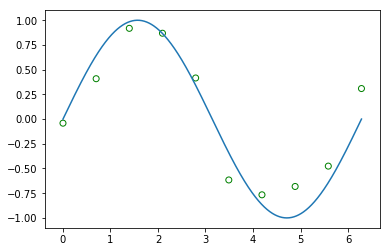

In [3]:
data_x, data_y = get_data(10)

plt.plot(sin_x, sin_y)
plt.scatter(data_x, data_y, marker='o', c='', edgecolors='g')

2.fit degree 3 and 9 curves in 10 samples

In [25]:
import tensorflow as tf

def normalization_degree_data(data_x_transform):
    mean = np.mean(data_x_transform, axis=0)
    std = np.mean(data_x_transform, axis=0)
    data_x_normalization = (data_x_transform-mean)/std
    return data_x_normalization, mean, std

def curve_fit_by_tf(data_x, data_y, degree, lr=1e-5, reg=0., n_iter=10000):
    data_x_transform = polynomial_map_x(data_x, degree)
    data_x_normalization, mean, std = normalization_degree_data(data_x_transform)
    X = tf.placeholder(tf.float64, shape=[None,degree+1])
    Y = tf.placeholder(tf.float64, shape=[None,1])
    w = tf.Variable(tf.random_normal([degree+1,1], stddev=1e-6, dtype=tf.float64), dtype=tf.float64)
#     b = tf.Variable(tf.zeros(degree+1, dtype=tf.float64), dtype=tf.float64)
    y = tf.matmul(X, w)
#     y = tf.matmul(X*std+mean, w)

    cost = tf.reduce_mean(tf.square(Y-y)) + reg * tf.reduce_sum(tf.square(w))

    train_op = tf.train.AdamOptimizer(lr).minimize(cost)

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(n_iter):
            _, c = sess.run([train_op, cost], feed_dict={X:data_x_transform, Y:data_y[:,None]})
#             _, c = sess.run([train_op, cost], feed_dict={X:data_x_normalization, Y:data_y[:,None]})
            if i%1000 == 0:
                print('Cost: ', c)
#                 coeff = sess.run(w)
#                 print(coeff)
        coeff = sess.run(w)
    return coeff

In [4]:
from sklearn.linear_model import LinearRegression
def curve_fit_by_sklearn(data_x, data_y, degree):
    data_x_transform = polynomial_map_x(data_x, degree)
    regr = LinearRegression(fit_intercept=False)
    regr.fit(data_x_transform, data_y[:,None])
    coeff = regr.coef_.flatten()
    return coeff

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Text(5.5,0.8,'M=3')

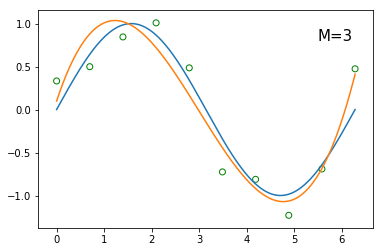

In [5]:
coeff_3 = curve_fit_by_sklearn(data_x, data_y, degree=3)
fit_y = polynomial_func(sin_x, coeff_3)
plt.plot(sin_x, sin_y)
plt.scatter(data_x, data_y, marker='o', c='', edgecolors='g')
plt.plot(sin_x, fit_y)
plt.text(5.5, 0.8, 'M=3', dict(size=15))

Text(5.5,0.8,'M=9')

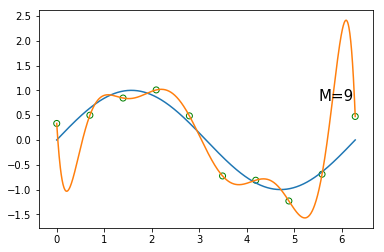

In [6]:
plt.plot(sin_x, sin_y)
plt.scatter(data_x, data_y, marker='o', c='', edgecolors='g')

coeff_9 = curve_fit_by_sklearn(data_x, data_y, degree=9)
fit_y = polynomial_func(sin_x, coeff_9)
plt.plot(sin_x, fit_y)
plt.text(5.5, 0.8, 'M=9', dict(size=15))

3.fit degree 9 curves in 15 and 100 samples

Text(5.5,0.8,'N=15')

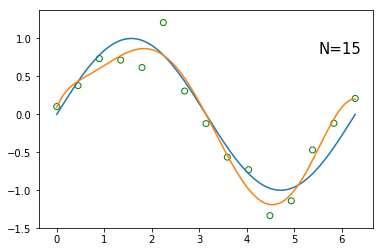

In [7]:
data_x, data_y = get_data(15)

plt.plot(sin_x, sin_y)
plt.scatter(data_x, data_y, marker='o', c='', edgecolors='g')

coeff_9 = curve_fit_by_sklearn(data_x, data_y, degree=9)
fit_y = polynomial_func(sin_x, coeff_9)
plt.plot(sin_x, fit_y)
plt.text(5.5, 0.8, 'N=15', dict(size=15))

Text(5.5,0.8,'N=100')

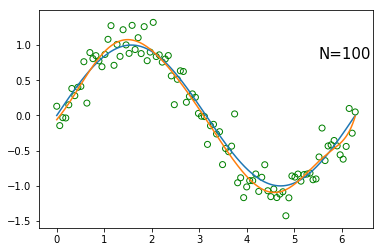

In [8]:
data_x, data_y = get_data(100)

plt.plot(sin_x, sin_y)
plt.scatter(data_x, data_y, marker='o', c='', edgecolors='g')

coeff_9 = curve_fit_by_sklearn(data_x, data_y, degree=9)
fit_y = polynomial_func(sin_x, coeff_9)
plt.plot(sin_x, fit_y)
plt.text(5.5, 0.8, 'N=100', dict(size=15))

4.fit degree 9 curve in 10 samples but with regularization term

Cost:  0.5152419515046175
Cost:  0.34446957599753725
Cost:  0.24395266710725544
Cost:  0.18537980080018648
Cost:  0.15813838253435936
Cost:  0.1490011750311037
Cost:  0.14589425990162566
Cost:  0.14287778393744882
Cost:  0.13890183118206437
Cost:  0.133961961550945


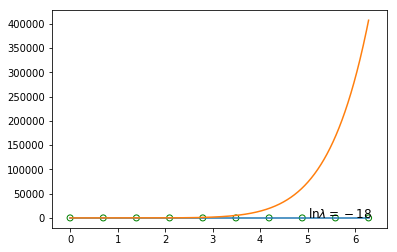

In [26]:
data_x, data_y = get_data(10)

plt.plot(sin_x, sin_y)
plt.scatter(data_x, data_y, marker='o', c='', edgecolors='g')

coeff_9 = curve_fit_by_tf(data_x, data_y, degree=9, lr=1e-4, reg=1e-18)
fit_y = polynomial_func(sin_x, coeff_9)
plt.text(5., 0.8, '$\ln\lambda=-18$', dict(size=12))
plt.plot(sin_x, fit_y)

## Homework 2 PCA
Represent digits '3' in 2D

### Raed data from UCI dataset and convert image from 32x32 to 16x16:

In [10]:
def read_data(name_file):
    f=open(name_file, "r")
    data=[]
    
    a=[]
    for line in f:
        if(len(line)==33):
            a.append(line[:32])

        elif(len(line)==3):
            digit=str(line)
            digit=digit.strip()
            if(digit=='3'):
                b=[]
                for i in range (32):
                    for j in range(32):
                        b.append(int(a[i][j]))
                data.append(b)
            a=[]
    f.close()
    return np.asarray(data,dtype=np.float32).reshape(-1,32,32)

import numpy as np
from skimage.transform import resize 

data = read_data('/Users/nico/Downloads/optdigits-orig.tra')
print(data.shape)

three_data = np.zeros([data.shape[0],16,16], dtype=np.float32)
for i, img in enumerate(data):
    three_data[i] = resize(img,output_shape=[16,16])
# three_data *= 255.
print(three_data.shape)

(199, 32, 32)
(199, 16, 16)


/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### Show all three data:

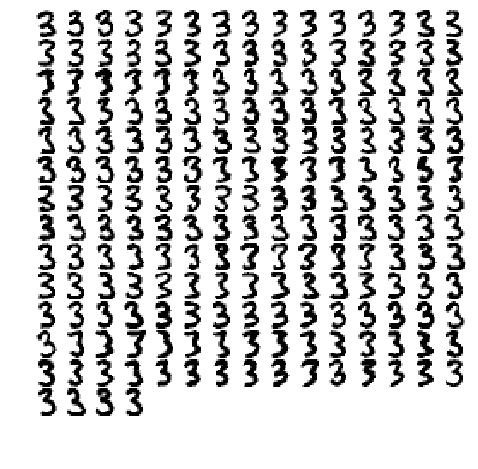

In [11]:
from math import sqrt, ceil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_grid(Xs, ubound=255.0, padding=1):
    (N, H, W) = Xs.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = Xs[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                # grid[y0:y1, x0:x1] = Xs[next_idx]
                next_idx += 1
                x0 += W + padding
                x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    # grid_max = np.max(grid)
    # grid_min = np.min(grid)
    # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
    return grid

grid = visualize_grid(three_data)
plt.imshow(grid.astype('uint8'), cmap='gray_r')
plt.axis('off')
plt.gcf().set_size_inches(8, 8)
plt.show()

### Rank-2 PCA for data

(256, 2)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


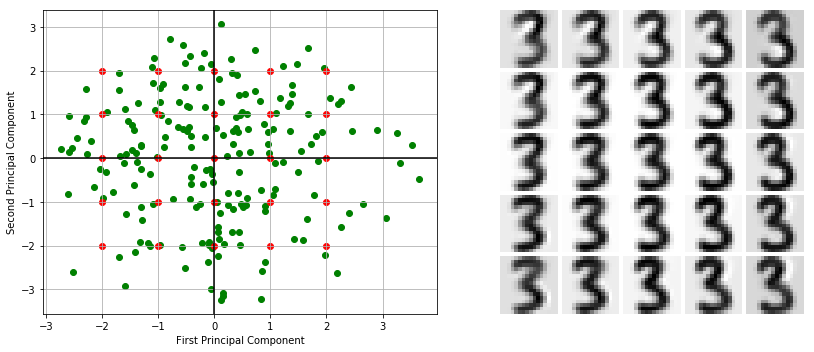

In [12]:
data = three_data.reshape(three_data.shape[0], -1)

# 中心化数据
data_mean = data.mean(axis=0)
data = data - data_mean
# 求协方差
cov_mat = np.cov(data, rowvar=0)

# 求特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# 对特征值排序
sorted_index = np.argsort(eig_vals)

# 取前两个特征值最大的特征向量作为基
rank2_vecs = eig_vecs[:,sorted_index[-2:]]
print(rank2_vecs.shape)

# 对所有的数据分别计算在这两个基上的投影，并作为坐标值
x, y = [], []
for img in data:
    x_ = np.inner(img,rank2_vecs[:, 0])
    y_ = np.inner(img,rank2_vecs[:, 1])
    x.append(x_)
    y.append(y_)

# 在图上均匀采样25个点
xx, yy = np.mgrid[-2:3,-2:3]
low_rank = np.vstack([xx.flatten(), yy.flatten()]).T
# 由这25个坐标值重构图像
recon_img = np.dot(low_rank, rank2_vecs.T) + data_mean
grid = visualize_grid(recon_img.reshape(-1,16,16))

plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax1.scatter(x, y, color='g')
ax1.scatter(xx, yy, color='r')
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

ax2 = plt.subplot(122)
ax2.imshow(grid.astype('uint8'), cmap='gray_r')
ax2.axis('off')
plt.tight_layout()

### Show mean and two eigenvectors

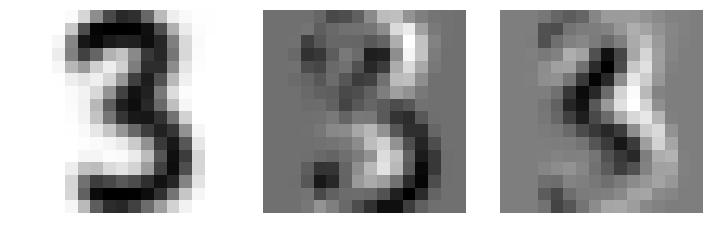

In [18]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(131)
ax1.imshow(data_mean.reshape(16,16), cmap='gray_r')
ax1.axis('off')

ax2 = plt.subplot(132)
ax2.imshow(eig_vecs[:, 0].real.reshape(16,16), cmap='gray_r')
ax2.axis('off')

ax3 = plt.subplot(133)
ax3.imshow(eig_vecs[:, 1].real.reshape(16,16), cmap='gray_r')
ax3.axis('off')
plt.tight_layout()